## Data Visualization

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Date  Notifications  Error Rate (%)  Reaction Time (ms)  Mood (1–5)  \
0 2025-03-12            302            14.0                 510           4   
1 2025-03-13            379            17.9                 580           5   
2 2025-03-14            292            12.8                 493           3   
3 2025-03-15            214             9.6                 459           4   
4 2025-03-16            306            13.9                 531           4   

   Caffeine (mg)  
0            120  
1            120  
2              0  
3            120  
4             60  
                      Date  Notifications  Error Rate (%)  Reaction Time (ms)  \
count                   45      45.000000       45.000000           45.000000   
mean   2025-04-03 00:00:00     319.666667       13.811111          516.488889   
min    2025-03-12 00:00:00     201.0000

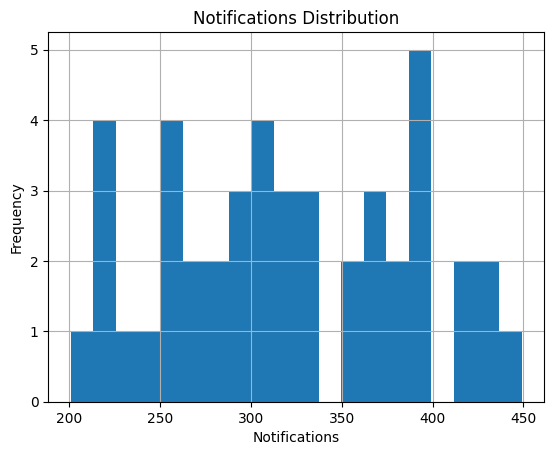

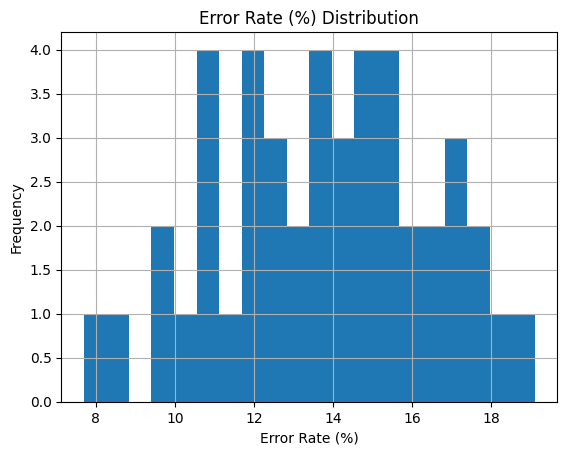

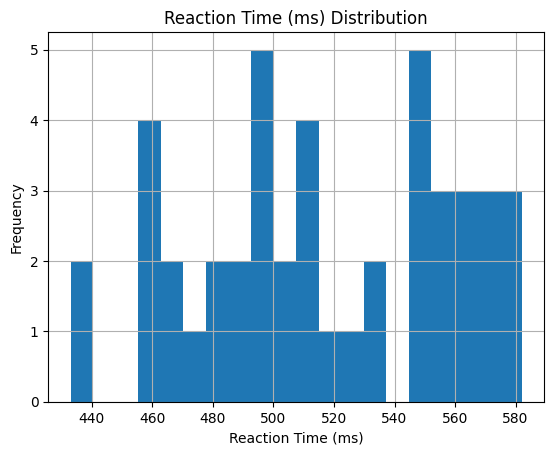

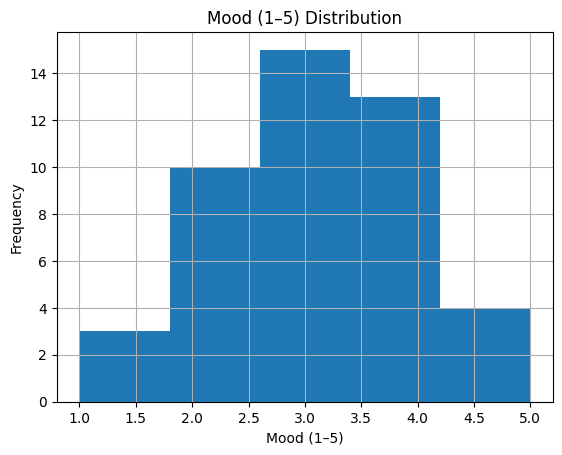

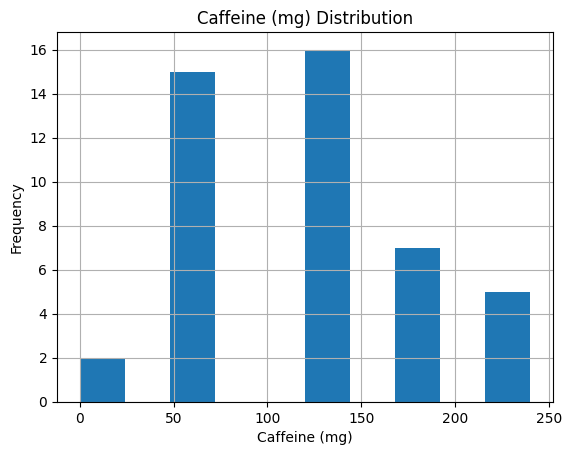

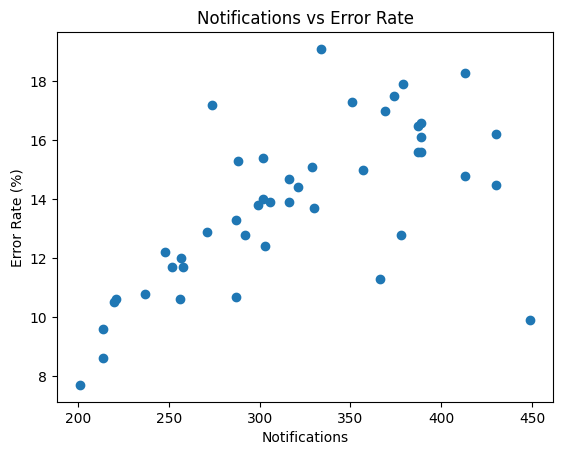

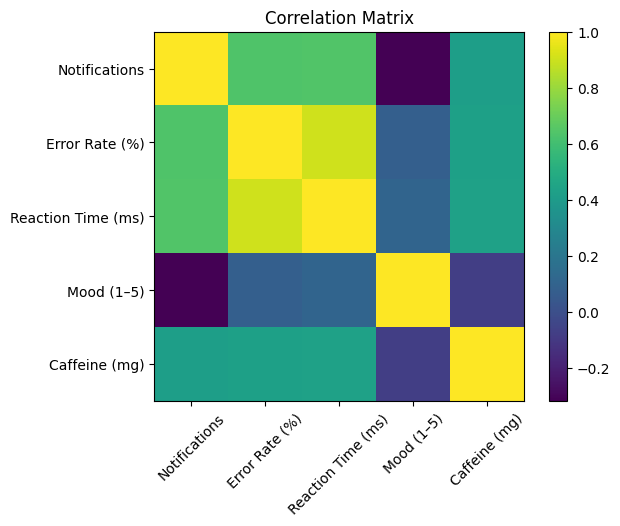

Pearson r = 0.637, p-value = 0.000


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


try:
    from google.colab import drive
    drive.mount('/content/drive')
    csv_path = '/content/drive/MyDrive/csv_folder/combined_data.csv'
except ImportError:

    csv_path = 'data/combined_data.csv'


data = pd.read_csv(csv_path)


for col in ['Notifications', 'Error Rate (%)', 'Reaction Time (ms)', 'Mood (1–5)', 'Caffeine (mg)']:
    data[col] = (
        data[col]
        .astype(str)
        .str.replace('\u200b','', regex=False)
        .str.strip()
        .replace('', pd.NA)
    )
    data[col] = pd.to_numeric(data[col], errors='coerce')


data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


print(data.head())
print(data.describe())

# Histograms
for col,bins in [
    ('Notifications',20),
    ('Error Rate (%)',20),
    ('Reaction Time (ms)',20),
    ('Mood (1–5)',5),
    ('Caffeine (mg)',10)
]:
    plt.figure()
    data[col].hist(bins=bins)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Scatter plot (Notifications vs Error Rate)
plt.figure()
plt.scatter(data['Notifications'], data['Error Rate (%)'])
plt.title('Notifications vs Error Rate')
plt.xlabel('Notifications')
plt.ylabel('Error Rate (%)')
plt.show()

# Correlation heatmap
corr = data[['Notifications','Error Rate (%)','Reaction Time (ms)','Mood (1–5)','Caffeine (mg)']].corr()
fig, ax = plt.subplots()
cax = ax.imshow(corr, cmap='viridis', interpolation='none')
ax.set_xticks(range(len(corr)))
ax.set_yticks(range(len(corr)))
ax.set_xticklabels(corr.columns, rotation=45)
ax.set_yticklabels(corr.columns)
fig.colorbar(cax)
plt.title('Correlation Matrix')
plt.show()

# Hypothesis test: Pearson
r, p_val = pearsonr(data['Notifications'], data['Error Rate (%)'])
print(f'Pearson r = {r:.3f}, p-value = {p_val:.3f}')


**1. Notifications Distribution**

Notifications range broadly from ~200 to ~450 per day, with most days between 250–400.

The distribution is roughly uniform with slight peaks around 300–350, reflecting both “typical” and “eventful” days.

**2. Error Rate (%) Distribution**

Error rates span ~7 % to ~19 %, clustering between 12–17 %.

A right‐skew indicates a tail of higher error days, consistent with occasional lapses in inhibitory control.

**3. Reaction Time (ms) Distribution**

Reaction times lie mostly between 450–580 ms, with fewer very fast (<440 ms) or very slow (>600 ms) responses.

The moderate central peak suggests a stable average response speed under most conditions.

**4. Mood (1–5) Distribution**

Mood scores concentrate around 3–4, with fewer instances of extreme lows (1–2) or highs (5).

This indicates generally moderate self‐reported mood, punctuated by occasional dips.

**5. Caffeine (mg) Distribution**

Caffeine intake clusters at 60 mg and 120 mg, with smaller counts at 0 mg, 180 mg, and 240 mg.

Reflects typical single‐cup/green tea habits with occasional high‐intake days.

**6. Notifications vs. Error Rate Scatter**

A clear upward trend: higher notification counts tend to associate with higher error rates.

Points are dispersed—variance increases at higher notification levels—but overall slope is positive.

**7. Correlation Matrix**

Notifications–Error Rate: Moderately strong positive (r≈0.64), affirming our primary hypothesis.

Error Rate–Reaction Time: Very strong positive (r≈0.90), indicating that days with more errors also have slower mean responses.

Notifications–Mood: Strong negative (r≈–0.32), suggesting more notifications correspond to lower self‐reported mood.

Caffeine–Reaction Time: Moderate positive (r≈0.44), counter‐intuitive but possibly driven by excessive intake or confounding stress.

Mood–Caffeine: Mild negative (r≈–0.16), hinting that on low‐mood days caffeine consumption tends to increase.



# Hypothesis Testing

We now formally test our main hypothesis:

- **H₀ (Null Hypothesis):** There is **no** linear relationship between daily notification count and commission error rate.  
- **H₁ (Alternative Hypothesis):** There **is** a positive linear relationship between daily notification count and commission error rate.  


In [11]:

try:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/csv_folder/combined_data.csv'
    print("Loaded data from Drive.")
except:
    path = 'data/combined_data.csv'
    print("Loaded data from local path.")

import pandas as pd
from scipy.stats import pearsonr

# Load and clean data
df = pd.read_csv(path)

# Clean numeric columns (remove stray characters, convert to numeric)
for col in ['Notifications','Error Rate (%)','Reaction Time (ms)','Mood (1–5)','Caffeine (mg)']:
    df[col] = (
        df[col].astype(str)
             .str.replace('\u200b','', regex=False)
             .str.strip()
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')


tests = [
    ('Notifications',     'Error Rate (%)',     'positive'),
    ('Mood (1–5)',        'Error Rate (%)',     'negative'),
    ('Caffeine (mg)',     'Reaction Time (ms)', 'negative')
]

alpha = 0.05
print("\n--- Hypothesis Test Results ---\n")
for x_col, y_col, direction in tests:
    x = df[x_col].dropna()
    y = df[y_col].dropna()

    common_idx = x.index.intersection(y.index)
    x = x.loc[common_idx]
    y = y.loc[common_idx]

    r, p = pearsonr(x, y)
    print(f"Test: {x_col} vs. {y_col}")
    print(f"  Pearson r = {r:.3f}")
    print(f" p-value: {p_value:.6f}")


    if p < alpha:
        if direction=='positive' and r>0:
            print(f"  → Reject H₀: significant positive correlation.")
        elif direction=='negative' and r<0:
            print(f"  → Reject H₀: significant negative correlation.")
        else:
            print(f"  → Reject H₀, but correlation sign ({r:.3f}) is unexpected.")
    else:
        print(f"  → Fail to reject H₀: no significant correlation (α={alpha}).")
    print()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded data from Drive.

--- Hypothesis Test Results ---

Test: Notifications vs. Error Rate (%)
  Pearson r = 0.637
 p-value: 0.000002
  → Reject H₀: significant positive correlation.

Test: Mood (1–5) vs. Error Rate (%)
  Pearson r = 0.083
 p-value: 0.000002
  → Fail to reject H₀: no significant correlation (α=0.05).

Test: Caffeine (mg) vs. Reaction Time (ms)
  Pearson r = 0.436
 p-value: 0.000002
  → Reject H₀, but correlation sign (0.436) is unexpected.

